In [63]:
# Importing required libraries
!pip install opencv-python

import time
import io
import requests
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from pymongo import MongoClient
import matplotlib.pyplot as plt
import cv2
import os
import sys
%matplotlib inline

### Page display simulation

In [64]:
# Base URL of the site to be analyzed
SITE_URL = 'https://alianzaverde.org.co'

In [65]:
# Firefox web driver path
# Download the driver for you S.O. here: https://github.com/mozilla/geckodriver/releases
DRIVER_PATH = './geckodriver.exe'

In [66]:
# Creating a new firefox window
browser = webdriver.Firefox(executable_path = DRIVER_PATH)

<ipython-input-66-c8b61cbdd697>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = DRIVER_PATH)


In [67]:
def make_request(browser,relative_path):
    # Making the request and rendering the browser
    browser.get(SITE_URL+relative_path)
    
    # Simulating vertical scrolling for handling lazy load
    check_height = browser.execute_script('return document.body.scrollHeight;')
    while True:
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(5)
        height = browser.execute_script('return document.body.scrollHeight;')
        if height == check_height: 
            break 
        check_height = height
    
    # Getting HTML content and passing it to BeautifulSoup for scraping analysis
    return BeautifulSoup(browser.page_source, 'html.parser')

In [68]:
 soup = make_request(browser,'/lideres-verdes/congreso-2022/senado-2022')


### Extract and organize the information of each of the candidates

In [69]:
# Get HTML content for candidate listing page
soup = make_request(browser,'/lideres-verdes/congreso-2022/senado-2022')
# Find the section where the data of each of the candidates is contained 
candidates = soup.find_all(class_ = 'sppb-col-md-3')
print(len(candidates))        

36


In [70]:
ruta = os.path.join(os.getcwd(),'Imagenes')

In [71]:
# Building a list with the url of the photo, the description and social networks of each of the candidates
news = []
socialmedia = []
descripciones = []
i = 0
for candidate in candidates:
    i+=1
    socialMediaLinks = ''
    if candidate.find(class_ = 'sppb-addon-wrapper')!= None:
        if candidate.find('ul',class_ = 'sppb-person-social')!= None:
            socialmedia = candidate.find('ul',class_ = 'sppb-person-social').find_all('li')
            for x in socialmedia:
                socialMediaLinks = socialMediaLinks+' ---- '+ x.find('a')['href']
            news.append({ 
            'Candidate number': i ,
            'Description': candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text(),
            'Social media': socialMediaLinks
            })
            url_img = 'https://alianzaverde.org.co/'+format (candidate.find('div',class_ = 'sppb-person-image').find(class_='sppb-img-responsive').get('src'))
            r = requests.get(url_img)
            file = io.BytesIO(r.content)
            img = Image.open(file)
            img.save("../ParcialSegundoCorte-BigData/Imagenes/"+str(i)+".jpg")
            
            descripciones.append(candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text())
            
        else:
            news.append({
            'Candidate number': i ,
            'Description': candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text(),
            'Social media': 'Does not have'
            })
            url_img = 'https://alianzaverde.org.co/'+format (candidate.find('div',class_ = 'sppb-person-image').find(class_='sppb-img-responsive').get('src'))
            r = requests.get(url_img)
            file = io.BytesIO(r.content)
            img = Image.open(file)
            img.save("../ParcialSegundoCorte-BigData/Imagenes/"+str(i)+".jpg")
            descripciones.append(candidate.find(class_ = 'person-content-hover-content-wrap').find('span').get_text())
        

In [72]:
archivos = os.listdir(ruta)
img_array = []
for x in range(1, len(archivos)+1):
    nuevo = str(ruta) + "/"+str(x)+".jpg"
    #Cargar la imagen con openCV
    imgBGR = cv2.imread(nuevo)
    #Cambiar esacio de color BGR a RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    #Arreglo con la informacion de las imagenes leidas
    img_array.append(imgRGB)

{'Candidate number': 1, 'Description': 'Abogada y filósofa, con un máster en Ciencias de la Administración Pública, en Alemania. Experta en gestión pública, descentralización, transparencia, buen gobierno, modernización del estado, cultura ciudadana y cooperación internacional, temas en los cuales se ha desempeñado alternativamente como servidora pública, consultora y docente.', 'Social media': ' ---- https://twitter.com/VivianaBarbere  ---- https://twitter.com/VivianaBarbere ---- https://www.instagram.com/barberenaviviana/ '}


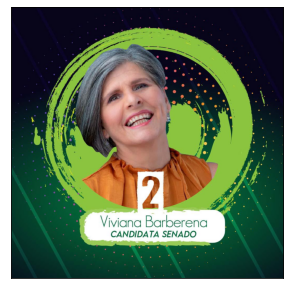


{'Candidate number': 2, 'Description': 'Nacida de seres excepcionales, en tiempos inciertos; es la mujer de retos resueltos. Desde el inicio de su carrera política, su liderazgo se enfoca en mantener la cultura de la equidad, la familia y el fortalecimiento económico, político y social de las regiones en Colombia', 'Social media': ' ---- https://www.facebook.com/sandraortizsenadora ---- https://twitter.com/sandraortizn ---- https://www.youtube.com/channel/UCTwjhE_bLZS72l0RqI_u4OQ/featured ---- https://www.instagram.com/sandraortizn'}


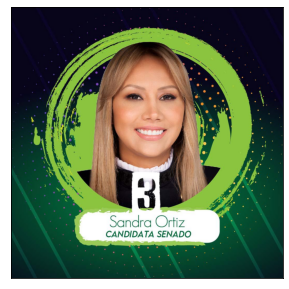


{'Candidate number': 3, 'Description': 'Destacado Senador de la República en el año 2010 fue disciplinado y estricto en el cumplimiento de su función en la producción legislativa y el ejercicio del control político; en particular, participó de forma definitiva en los Proyectos de Ley y de Acto Legislativo trascendentales para el país.', 'Social media': ' ---- https://www.facebook.com/JorgeELondonoU/ ---- https://twitter.com/JorgeELondonoU ---- https://youtube.com/user/JorgeLondonoUlloa ---- http://instagram.com/jorgeelondonou'}


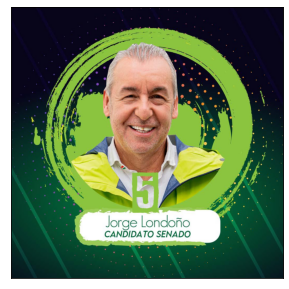


{'Candidate number': 4, 'Description': 'Egresado de la Facultad de Derecho de la Pontificia Universidad Javeriana; fue Diputado a la Asamblea de Cundinamarca, Concejal, Representante a la Cámara por Bogotá y Senador, además de ser fundador del Partido Alianza Verde. Correo de contacto', 'Social media': ' ---- https://www.facebook.com/SenadorIvanName  ---- / https://twitter.com/IvanNameVasquez  ---- https://www.instagram.com/ivannamevasquez/ '}


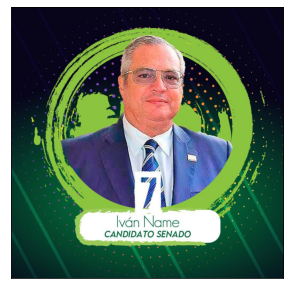


{'Candidate number': 5, 'Description': 'Como congresista pertenece a la Comisión sexta, la comisión de paz y la Comisión de Derechos Humanos. Ha presentado iniciativas para reformar el sistema general de participaciones y la jornada laboral. Ha presentado proyectos de ley que fortalezcan la nutrición saludable, el internet gratuito, el financiamiento a los cuerpos de bomberos, la creación de las provincias, entre otras.', 'Social media': ' ---- https://www.facebook.com/Leonfredym ---- https://twitter.com/LeonFredyM  ---- https://www.instagram.com/leonfredymunozl'}


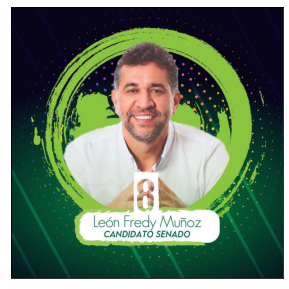


{'Candidate number': 6, 'Description': 'Ciudadana, activista cívica, abogada y Senadora de 2018 a 2022 por el partido Alianza Verde. Representante a la Cámara por Bogotá en 2014 - 2018. Magíster en Gerencia y Práctica del Desarrollo en la Universidad de los Andes y becaria del Instituto Nacional Demócrata (NDI).', 'Social media': ' ---- https://www.facebook.com/angelicalozanocorrea/  ---- https://twitter.com/AngelicaLozanoC  ---- https://www.youtube.com/user/bogotaserespeta ---- https://www.instagram.com/angelicalozano10/'}


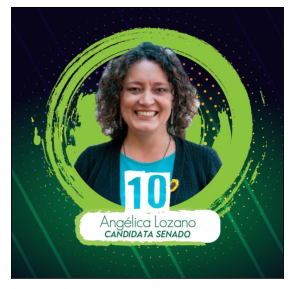


{'Candidate number': 7, 'Description': 'Nacida en Villa de Leyva Boyacá. Desde su infancia se caracterizó por el amor a su familia, solidaridad y capacidad de asumir retos. Ingeniera Industrial de la Universidad Pedagógica y Tecnológica de Colombia, con una Maestría en en pensamiento estratégico y perspectiva de la Universidad Externado de Colombia.', 'Social media': ' ---- / https://www.facebook.com/karolina.jerez  ---- https://twitter.com/CaroEspitiaJ  ---- https://www.instagram.com/caroespitiaj/ '}


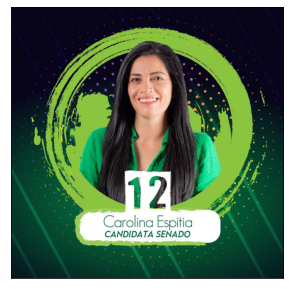


{'Candidate number': 8, 'Description': 'Profesora universitaria. Autora de varias publicaciones sobre derechos animales y justicia juvenil restaurativa (Beca de Investigación del Grupo Coímbra. Programa de Becas para Jóvenes Profesores e Investigadores de Universidades de América Latina, 2009). Columnista ocasional de varios medios de comunicación.', 'Social media': ' ---- https://www.facebook.com/andreanimalidad ---- https://twitter.com/andreanimalidad  ---- https://www.youtube.com/channel/UCnJ85DTEYtqUJ1o9wQLsbyA  ---- https://www.instagram.com/andreanimalidad'}


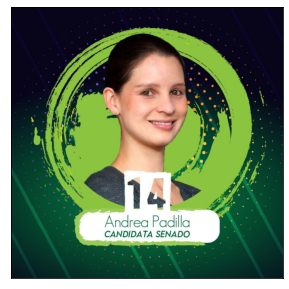


{'Candidate number': 9, 'Description': 'Magíster en Gestión de la Tecnología Educativa. Ex presidente de Sindimaestros en Boyacá. Ex presidente de FECODE y actualmente Ejecutivo (tesorero)Dirigente estudiantil, sindical, social y político desde hace 32 años.', 'Social media': ' ---- https://www.facebook.com/nelson.alarconsuarez.16  ---- https://twitter.com/Nelsonalarcon74  ---- https://www.youtube.com/channel/UC0yGgG_Jj4cUa8kdv_J5n2w  ---- https://www.instagram.com/nelsonalarcon74/ '}


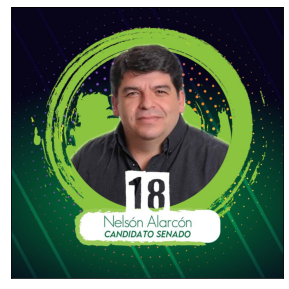


{'Candidate number': 10, 'Description': 'Nació en Pereira en 1946, el cuarto de once hermanos, en la época de la Violencia… cuando liberales y conservadores se mataban. Por eso desde pequeño sabe que lo más importante para el país es que las personas aprendamos a convivir, a dignificar la existencia humana.', 'Social media': ' ---- https://www.facebook.com/IvanMarulandaGomez ---- https://twitter.com/ivanmarulanda ---- https://www.youtube.com/c/IvánMarulandaGomezCo  ---- https://www.instagram.com/ivanmarulandagomez/ '}


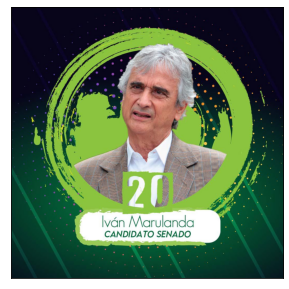


{'Candidate number': 11, 'Description': 'Miembro de la Comisión Segunda del Senado y Co-Presidente de la Comisión de Paz. Sociólogo, Magíster en Desarrollo Regional de la Universidad de Los Andes y Doctor en Gobierno y Administración Pública de la Universidad Complutense de Madrid. Fue Concejal de Bogotá de 2008 a diciembre de 2017.', 'Social media': ' ---- https://www.facebook.com/antonio.sanguino.79  ---- https://twitter.com/AntonioSanguino ---- https://www.youtube.com/channel/UC7yjLuIJdAaJXoIRDSEChHw  ---- https://www.instagram.com/antonio_sanguino '}


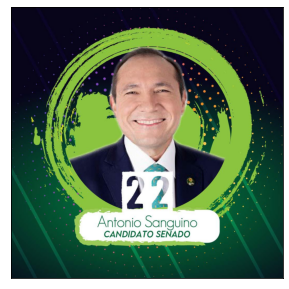


{'Candidate number': 12, 'Description': 'Líder ambiental de Piedecuesta, ha sido visible en el movimiento ambiental del departamento. Trabajó en la Alcaldía de Piedecuesta en la Oficina de Control Interno. Terminó materias de administración de empresas en la Universidad Cooperativa de Colombia, y es perito certificado por la Lonja de Propiedad horizontal, así como tecnólogo del Sena en mercado y venta de bienes inmuebles.', 'Social media': ' ---- https://www.facebook.com/fabiandiazcomunidad/  ---- https://twitter.com/FabianDiazPlata  ---- https://instagram.com/fabiandiaz.plata '}


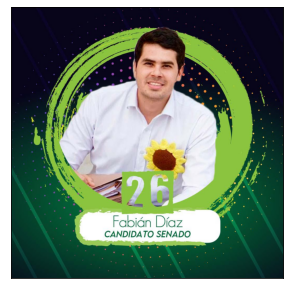


{'Candidate number': 13, 'Description': 'Abogada de la Universidad Nacional de Colombia, trabajó con la Rama Judicial y el Acueducto de Bogotá como asesora jurídica. Actualmente es abogada militante. Literaria y novelista con publicaciones de sus escritos. Trabaja con la cultura y la comunidad en asuntos sociales.', 'Social media': ' ---- https://www.facebook.com/PartidoAlianzaVerde'}


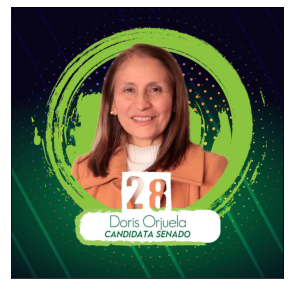


{'Candidate number': 14, 'Description': 'Profesional en Gobierno y Relaciones internacionales con maestría en Desarrollo Regional y dos años de experiencia en en entidades de cooperación internacional y del Estado. Enfoque de trabajo en gobernanza, construcción de paz, transparencia y equidad de género.', 'Social media': ' ---- https://www.facebook.com/Linaarangorisaralda  ---- https://twitter.com/linamariaarango ---- https://www.instagram.com/linaarangosenadora/ '}


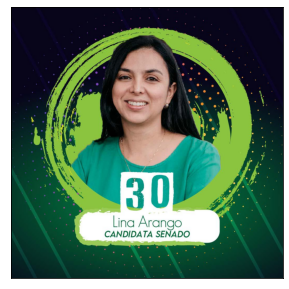


{'Candidate number': 15, 'Description': 'Activista estudiantil vinculado a las luchas agrarias de los campesinos por la tierra para quien la trabaja de la ANUC línea Sincelejo. Fundador de la Asociación de adjudicatarios de vivienda del ICT y UPAC, fue su Presidente, Miembro destacado del Consejo Nacional de los pueblos cívicos comunales y la Coordinadora de Vivienda Popular en los años 1980. Líder sindical de la subdirectiva sindical de Telecom en Montería Córdoba, Miembro vicepresidente de  Consejo de planeación territorial del Atlántico en la primera generación de consejeros con el nacimiento de la ley de participación territorial. ', 'Social media': ' ---- https://www.facebook.com/PartidoAlianzaVerde/'}


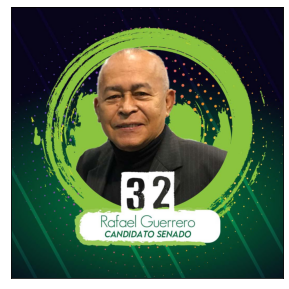


{'Candidate number': 16, 'Description': 'Abogado de la Universidad de los Andes, especialista en Estado, Políticas públicas y Desarrollo. Activista social y medio ambiental. Autor del libro titulado “Agua” fiel creyente de los cambios a través del proceso democrático y participativo, basado en los principios progresistas.', 'Social media': ' ---- https://www.facebook.com/Frankcanossa  ---- / https://twitter.com/canossafrank  ---- https://www.instagram.com/canossafrank/ '}


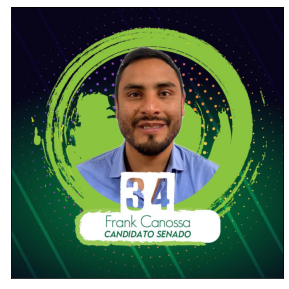


{'Candidate number': 17, 'Description': 'Abogado de la Universidad de los Andes, Especialista en Derecho, Magíster en Educación y en Derecho, Doctor en Derecho (PDH). INVESTIGADOR SENIOR RECONOCIDO POR MIN CIENCIAS. AUTOR DE DIFERENTES LIBROS EN ÁREAS EDUCATIVAS Y JURÍDICAS.', 'Social media': ' ---- https://www.facebook.com/js.perilla117 ---- https://twitter.com/juansperilla  ---- https://www.instagram.com/juansperilla/ '}


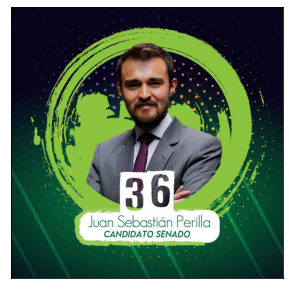

In [ ]:
import pylab

for x in range(0, len(archivos)):
    fig1 = plt.figure(1)
#Ocultar valores numericos de los ejes
    plt.xticks([])
    plt.yticks([])
#tamaño de imagen
    fig1.set_size_inches(5, 5)
    plt.imshow(img_array[x])
    print (news[x])
    pylab.show()
    print()